<a href="https://colab.research.google.com/github/rberbenkova/lab-neural-networks/blob/master/challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Challenge 1 - Tic Tac Toe

In this lab you will perform deep learning analysis on a dataset of playing [Tic Tac Toe](https://en.wikipedia.org/wiki/Tic-tac-toe).

There are 9 grids in Tic Tac Toe that are coded as the following picture shows:

![Tic Tac Toe Grids](tttboard.jpg)

In the first 9 columns of the dataset you can find which marks (`x` or `o`) exist in the grids. If there is no mark in a certain grid, it is labeled as `b`. The last column is `class` which tells you whether Player X (who always moves first in Tic Tac Toe) wins in this configuration. Note that when `class` has the value `False`, it means either Player O wins the game or it ends up as a draw.

Follow the steps suggested below to conduct a neural network analysis using Tensorflow and Keras. You will build a deep learning model to predict whether Player X wins the game or not.

## Step 1: Data Engineering

This dataset is almost in the ready-to-use state so you do not need to worry about missing values and so on. Still, some simple data engineering is needed.

1. Read `tic-tac-toe.csv` into a dataframe.
1. Inspect the dataset. Determine if the dataset is reliable by eyeballing the data.
1. Convert the categorical values to numeric in all columns.
1. Separate the inputs and output.
1. Normalize the input data.

In [1]:
# Initial import and setu up
import numpy as np
import pandas as pd



In [2]:
## 1. LOAD DATA and Read the CSV into a DataFrame
# Adjust the path/filename to where your file lives
df = pd.read_csv("/content/tic-tac-toe.csv")

# Peek
df.head()

,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
0,x,x,x,x,o,o,x,o,o,True
1,x,x,x,x,o,o,o,x,o,True
2,x,x,x,x,o,o,o,o,x,True
3,x,x,x,x,o,o,o,b,b,True
4,x,x,x,x,o,o,b,o,b,True


In [3]:
## 2.Inspect the dataset. Determine if the dataset is reliable by eyeballing the data.

# BASIC STRUCTURE

print(df.shape)  # Shows the dimensions of the DataFrame: (number_of_rows, number_of_columns)
print(df.columns.tolist())  # Displays all column names as a list

df.info()
# Provides comprehensive metadata including:
# Number of non-null values per column
# Data types (int, float, object, etc.)
# Memory usage
# Helps identify missing values and data type issues

# UNIQUE VALUES per column: Purpose: Understand the diversity and range of values in each column
# Helps identify: categorical variables, potential data quality issues, outliers
for c in df.columns:
    print(c, sorted(df[c].astype(str).unique()))
# Loops through each column in the DataFrame
# For each column:
# df[c].astype(str) - Converts values to strings (ensures consistent handling)
# .unique() - Gets all distinct values
# sorted() - Arranges values in alphabetical/numerical order

# Quick class BALANCE CHECK:
# Class Distribution Check: Purpose: Check for class imbalance in classification problems
# Shows how many examples belong to each category
print(df['class'].value_counts(dropna=False))
# df['class'] - Targets the specific 'class' column (typically the target variable)
# .value_counts() - Counts occurrences of each unique value
# dropna=False - Includes NaN/missing values in the count


## expected output:
## 10 columns total: the first 9 are the board cells (values like 'x', 'o', 'b'),
## and the last is the target (often True/False or positive/negative).
## No weird symbols beyond x/o/b in the 9 board columns.
## Reasonable class balance (doesn’t have to be perfectly 50/50).

(958, 10)
['TL', 'TM', 'TR', 'ML', 'MM', 'MR', 'BL', 'BM', 'BR', 'class']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   TL      958 non-null    object
 1   TM      958 non-null    object
 2   TR      958 non-null    object
 3   ML      958 non-null    object
 4   MM      958 non-null    object
 5   MR      958 non-null    object
 6   BL      958 non-null    object
 7   BM      958 non-null    object
 8   BR      958 non-null    object
 9   class   958 non-null    bool  
dtypes: bool(1), object(9)
memory usage: 68.4+ KB
TL ['b', 'o', 'x']
TM ['b', 'o', 'x']
TR ['b', 'o', 'x']
ML ['b', 'o', 'x']
MM ['b', 'o', 'x']
MR ['b', 'o', 'x']
BL ['b', 'o', 'x']
BM ['b', 'o', 'x']
BR ['b', 'o', 'x']
class ['False', 'True']
class
True     626
False    332
Name: count, dtype: int64


In [4]:
## 3. Convert categorical values to numeric (inputs + target)
## Option A (compact, works well): map each cell to −1/0/+1
# x → 1 (good for X)
# o → -1 (good for O)
# b → 0 (blank)

# Identify the 9 board columns (rename this list if your CSV uses different names)
board_cols = [c for c in df.columns if c != "class"]

# List comprehension that creates a list of all column names EXCEPT 'class'
# Assumes 'class' is the target variable (win/loss outcome)
# Example: If columns are ['a1', 'a2', 'a3', 'b1', 'b2', 'b3', 'c1', 'c2', 'c3', 'class']
# Then board_cols = ['a1', 'a2', 'a3', 'b1', 'b2', 'b3', 'c1', 'c2', 'c3']


# Map cells to numbers
cell_map = {'x': 1, 'o': -1, 'b': 0}
X_num = df[board_cols].apply(lambda s: s.astype(str).str.lower().map(cell_map))

# Map target to 0/1 (1 = X wins)
y_map = {'true': 1, 'false': 0, 'positive': 1, 'negative': 0}
y = df['class'].astype(str).str.lower().map(y_map).astype(int)

# Sanity check
print(X_num.head())
print(y.value_counts())

#This gives you a clean numeric 9-dimensional input per board.

   TL  TM  TR  ML  MM  MR  BL  BM  BR
0   1   1   1   1  -1  -1   1  -1  -1
1   1   1   1   1  -1  -1  -1   1  -1
2   1   1   1   1  -1  -1  -1  -1   1
3   1   1   1   1  -1  -1  -1   0   0
4   1   1   1   1  -1  -1   0  -1   0
class
1    626
0    332
Name: count, dtype: int64


In [5]:
## 4. Separate the inputs and output(already done above)

# X_num is your inputs (shape: n_samples × 9)
# y is your output (0/1)

# Optionally, save combined clean data:

clean_df = X_num.copy()
clean_df['class'] = y
clean_df.head()



,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
0,1,1,1,1,-1,-1,1,-1,-1,1
1,1,1,1,1,-1,-1,-1,1,-1,1
2,1,1,1,1,-1,-1,-1,-1,1,1
3,1,1,1,1,-1,-1,-1,0,0,1
4,1,1,1,1,-1,-1,0,-1,0,1


In [6]:
## 5. Normalize the input data.
## Even though the features are just −1/0/+1,
## it’s a good habit to normalize using only the training split to avoid leakage.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X_num.values, y.values, test_size=0.2, random_state=17, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # fit on train
X_test_scaled  = scaler.transform(X_test)       # transform test with same params

print(X_train_scaled.shape, X_test_scaled.shape)

(766, 9) (192, 9)


In [7]:
# With values centered around 0 (because of −1/0/+1),
# SCALING mainly standardizes variance across features—helpful for stable NN training

## Step 2: Build Neural Network

To build the neural network, you can refer to your own codes you wrote while following the [Deep Learning with Python, TensorFlow, and Keras tutorial](https://www.youtube.com/watch?v=wQ8BIBpya2k) in the lesson. It's pretty similar to what you will be doing in this lab.

1. Split the training and test data.
1. Create a `Sequential` model.
1. Add several layers to your model. Make sure you use ReLU as the activation function for the middle layers. Use Softmax for the output layer because each output has a single lable and all the label probabilities add up to 1.
1. Compile the model using `adam` as the optimizer and `sparse_categorical_crossentropy` as the loss function. For metrics, use `accuracy` for now.
1. Fit the training data.
1. Evaluate your neural network model with the test data.
1. Save your model as `tic-tac-toe.model`.

In [8]:
# 1.Split the training and test data. Already done above
# ALREADY have X_train_scaled, X_test_scaled, y_train, y_test from Step A5


In [9]:

# Imports:
import tensorflow as tf
print(tf.__version__)
print(hasattr(tf, 'keras'))

from tensorflow import keras
from keras import layers, callbacks



2.19.0
True


In [10]:
# 2.Create a SEQUENTIAL MODEL.
# Build the model (Sequential, ReLU hidden layers, Softmax output with 2 classes)

# INPUT: Determine input dimensionality

input_dim = X_train_scaled.shape[1]   # should be 9: used -1/0/+1 mapping

#X_train_scaled is a 2D array shaped (n_samples, n_features).
# shape[1] is the number of features per example.
# With the {-1,0,1} encoding there are 9 squares → input_dim = 9.
# Keras needs this to know how many inputs the first layer expects per sample.



# Build a Sequential model (stack of layers)

model = keras.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.15),
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.15),
    layers.Dense(2, activation="softmax")
])

# layers.Input(shape=(input_dim,))
    # Declares the shape of one input sample: a length-input_dim vector.
    # The batch dimension is left flexible (e.g., (None, input_dim)).

# layers.Dense(64, activation="relu")
    # A fully connected (affine) transform: z = W·x + b, with 64 neurons.
    # activation="relu" applies ReLU: relu(z) = max(0, z) elementwise
    # Output shape: (None, 64) — 64 activations per sample.
    # Parameter count: (input_dim * 64) + 64 (weights + biases).
        # If input_dim=9, that’s 9*64 + 64 = 640.

# layers.Dropout(0.15)
    # During training, randomly zeros 15% of the previous layer’s activations (different mask each batch).
    # Purpose: regularization (reduces overfitting).
    # No trainable parameters. Output shape stays (None, 64).

# layers.Dense(32, activation="relu")
    # Another dense layer, now with 32 neurons, ReLU.
    # Output shape: (None, 32).
    # Parameter count: (64 * 32) + 32 = 2048 + 32 = 2080.

# layers.Dropout(0.15) (again)
    # Same idea as above, now applied to the 32-unit layer.
    # Output shape remains (None, 32).

# layers.Dense(2, activation="softmax")
    # Final dense layer with 2 outputs: one for each class
    # index 0 → “not X wins”
    # index 1 → “X wins”

# softmax converts logits to probabilities that sum to 1 across the 2 outputs:
    # p_i = exp(logit_i) / (exp(logit_0) + exp(logit_1))
    # Output shape: (None, 2).
    # Parameter count: (32 * 2) + 2 = 66.
    # Why 2 units + softmax? Instructions requested softmax for a probability distribution over classes.
    # (Alternative for binary problems: 1 unit + sigmoid + binary_crossentropy.)


# 4.COMPILE: choose optimizer, loss, metrics
# Compile the model using adam as the optimizer and sparse_categorical_crossentropy as the loss function.
# For metrics, use accuracy for now.

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

    # Optimizer = Adam: adaptive learning rate; robust default.
    # Loss = sparse_categorical_crossentropy: expects integer labels (0 or 1).
    # Internally it compares the predicted softmax distribution to the true class index.
    # If your labels are one-hot vectors (e.g., [1,0] or [0,1]), you’d use categorical_crossentropy instead.
    # Metric = accuracy: fraction of correct predictions on each batch/epoch

model.summary()

## Output Shape: the tensor shape after each layer; None is the flexible batch size.
## Param #: trainable parameters per layer:
## Dense params = inputs * units + units.
## Total params: sum across layers; with input_dim=9, it’s 640 + 2080 + 66 = 2786.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,786 (10.88 KB)

 Trainable params: 2,786 (10.88 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
## End-to-end shape flow (with input_dim=9)
## Input: (None, 9)
## Dense(64): (None, 64)
## Dropout(0.15): (None, 64)
## Dense(32): (None, 32)
## Dropout(0.15): (None, 32)
## Dense(2, softmax): (None, 2)
## At inference, each sample produces a 2-element probability vector; argmax gives the predicted class.

In [12]:
from tensorflow import keras

callbacks_list = [
    keras.callbacks.EarlyStopping(patience=10),
    keras.callbacks.ModelCheckpoint('best_model.h5'),
    keras.callbacks.ReduceLROnPlateau(patience=5)
]


# EARLY STOPPING: stop when val_loss stops improving; restore best weights
es = callbacks.EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True
)


In [13]:
# 5. FIT MODEL WITH training data:

history = model.fit(
    X_train_scaled,   # features (NumPy array), shape (n_train, n_features)
    y_train,          # integer labels (0 or 1), shape (n_train,)
    validation_split=0.20,  # use 20% of TRAIN data for validation
    epochs=200,              # upper bound on passes over the training data
    batch_size=32,          # number of samples per gradient update
    callbacks=[es],         # apply EarlyStopping during training
    verbose=1               # show progress per epoch
)





Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - accuracy: 0.4881 - loss: 0.7294 - val_accuracy: 0.5909 - val_loss: 0.6467
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6440 - loss: 0.6184 - val_accuracy: 0.6558 - val_loss: 0.6275
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6963 - loss: 0.5736 - val_accuracy: 0.6753 - val_loss: 0.6062
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7622 - loss: 0.5339 - val_accuracy: 0.6948 - val_loss: 0.5849
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7631 - loss: 0.5282 - val_accuracy: 0.6883 - val_loss: 0.5659
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7294 - loss: 0.5340 - val_accuracy: 0.7078 - val_loss: 0.5553
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7795 - loss: 0.5056 - val_accuracy: 0.7338 - val_loss: 0.5330
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8002 - loss: 0.4745 - val_accuracy: 0.7078 -

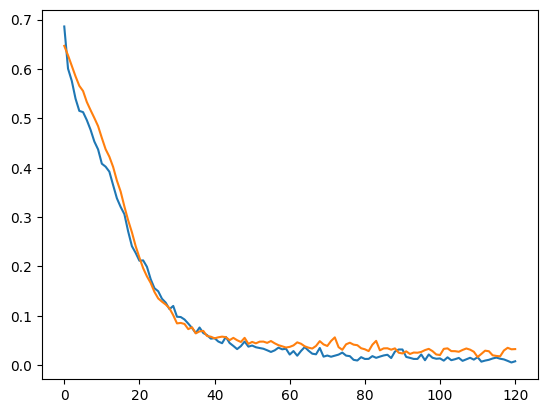

In [14]:
# PLOT Learning Curves from history object
import matplotlib.pyplot as plt
plt.plot(history.history["loss"]); plt.plot(history.history["val_loss"]); plt.show()

In [15]:
# 6. Evaluate your neural network model with the test data.

test_loss, test_acc = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")



Test accuracy: 0.9896


In [16]:
# 7. Save your model as tic-tac-toe.model.
# Save in TensorFlow SavedModel format (creates a folder named 'tic-tac-toe.model')
model.export("tic-tac-toe.model")
print("Exported SavedModel to tic-tac-toe.model")

Saved artifact at 'tic-tac-toe.model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 9), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  134850529914768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134850529916112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134850529917456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134850529915728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134850529915536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134850529917648: TensorSpec(shape=(), dtype=tf.resource, name=None)
Exported SavedModel to tic-tac-toe.model


## Step 3: Make Predictions

Now load your saved model and use it to make predictions on a few random rows in the test dataset. Check if the predictions are correct.

In [17]:
import numpy as np
import tensorflow as tf

# 1) Load the SavedModel (inference graph)
loaded_sm = tf.saved_model.load("tic-tac-toe.model")

# Inspect available signatures (usually has 'serving_default')
print("Signatures:", list(loaded_sm.signatures.keys()))
infer = loaded_sm.signatures["serving_default"]

# 2) Pick a few random test rows
np.random.seed(42)
idx = np.random.choice(len(X_test_scaled), size=5, replace=False)
X_sample = X_test_scaled[idx].astype("float32")  # SavedModel expects float32 tensors
y_true  = y_test[idx]

# 3) Run inference (returns a dict of tensors)
out = infer(tf.constant(X_sample))
# Grab the first (and only) tensor from the dict
probs = next(iter(out.values())).numpy()         # shape (5, 2)
preds = probs.argmax(axis=1)

# 4) Show results
for i, (p, y) in enumerate(zip(preds, y_true)):
    print(f"Row {idx[i]:>4}:  pred={p}  prob_Xwins={probs[i,1]:.3f}  true={y}  correct={p==y}")

sample_acc = (preds == y_true).mean()
print(f"\nSample accuracy on these 5 rows: {sample_acc:.2f}")



Signatures: ['serve', 'serving_default']
Row   45:  pred=0  prob_Xwins=0.000  true=0  correct=True
Row  136:  pred=1  prob_Xwins=1.000  true=1  correct=True
Row   76:  pred=0  prob_Xwins=0.001  true=0  correct=True
Row  143:  pred=1  prob_Xwins=1.000  true=1  correct=True
Row  113:  pred=0  prob_Xwins=0.000  true=0  correct=True

Sample accuracy on these 5 rows: 1.00


## Step 4: Improve Your Model

Did your model achieve low loss (<0.1) and high accuracy (>0.95)? If not, try to improve your model.

But how? There are so many things you can play with in Tensorflow and in the next challenge you'll learn about these things. But in this challenge, let's just do a few things to see if they will help.

* Add more layers to your model. If the data are complex you need more layers. But don't use more layers than you need. If adding more layers does not improve the model performance you don't need additional layers.
* Adjust the learning rate when you compile the model. This means you will create a custom `tf.keras.optimizers.Adam` instance where you specify the learning rate you want. Then pass the instance to `model.compile` as the optimizer.
    * `tf.keras.optimizers.Adam` [reference](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam).
    * Don't worry if you don't understand what the learning rate does. You'll learn about it in the next challenge.
* Adjust the number of epochs when you fit the training data to the model. Your model performance continues to improve as you train more epochs. But eventually it will reach the ceiling and the performance will stay the same.

In [18]:
# Add MORE LAYERS to the model.

In [19]:
# Adjust the LEARNING RATE when you compile the model.
# This means you will create a custom tf.keras.optimizers.Adam instance where you specify the learning rate you want. Then pass the instance to model.compile as the optimizer.

In [20]:
# Adjust the NUMBER OF EPOCHS when fitting the training data to model.
# As more epochs trained, model performance improves, until it reaches the plateu.

**Which approach(es) did you find helpful to improve your model performance?**

In [21]:
# your answer here